# Exploratory Data Analysis III
#### This kernel is to investigate shops and items

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
PATH_TO_DATA = 'data/predict_future_sales'
items = pd.read_csv(os.path.join(PATH_TO_DATA, 'items.csv'))
item_categories = pd.read_csv(os.path.join(PATH_TO_DATA, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(PATH_TO_DATA, 'shops.csv'))
test = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(PATH_TO_DATA, 'sample_submission.csv'))
sales_train = pd.read_pickle('data/sales_train_dwncast.pkl')

In [4]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
test.tail()

,ID,shop_id,item_id
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
214199,214199,45,969


In [7]:
sample_submission.tail()

,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


### To explore the items sold in shop over a period of time, lets convert the date to pandas datetime format

In [8]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,2015-10-10,33,25,7409,299.0,1.0
2935845,2015-10-09,33,25,7460,299.0,1.0
2935846,2015-10-14,33,25,7459,349.0,1.0
2935847,2015-10-22,33,25,7440,299.0,1.0
2935848,2015-10-03,33,25,7460,299.0,1.0


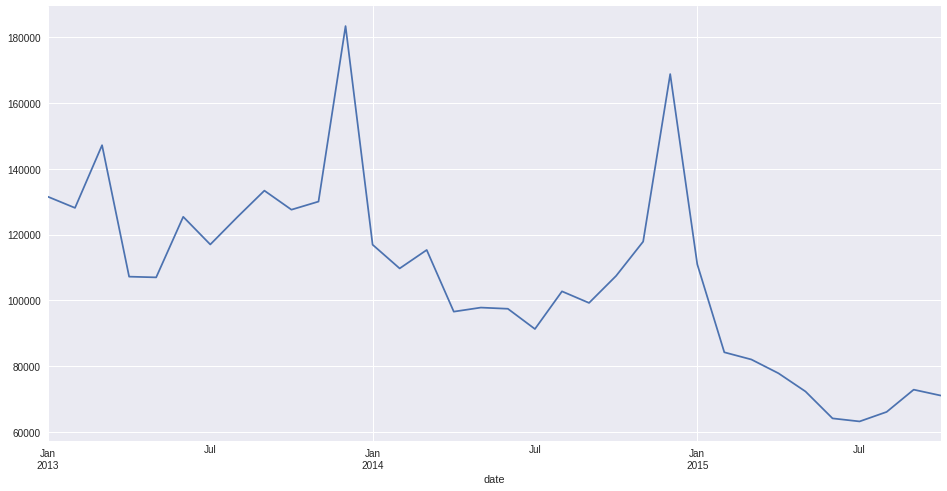

In [34]:
# monthly sampling distribution on the train data
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
sales_train.copy().set_index('date').item_cnt_day.resample('M').sum().plot()

In [41]:
s_train = pd.DataFrame(sales_train.copy().set_index('date').item_cnt_day.resample('M').sum())
s_train[s_train['item_cnt_day']>160000]

,item_cnt_day
date,
2013-12-31,183342.0
2014-12-31,168755.0


### Sales Observation
There is an sharp increase in the number of items sold in December(both 2013 and 2014), this is the holiday period.
But there is a negative trend, i.e. general decrease in sales (even in the holiday period)